# Classification d'Images avec Fashion MNIST

### Importation des bibliothéques:

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

### Chargement des données:

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normaliser les données
X_train = X_train / 255.0
X_test = X_test / 255.0

# Classes des vêtements 
class_names = [
    'T-shirt/haut', 'Pantalon', 'Pull', 'Robe', 'Manteau',
    'Sandale', 'Chemise', 'Basket', 'Sac', 'Bottine'
]



###  Visualisation des données

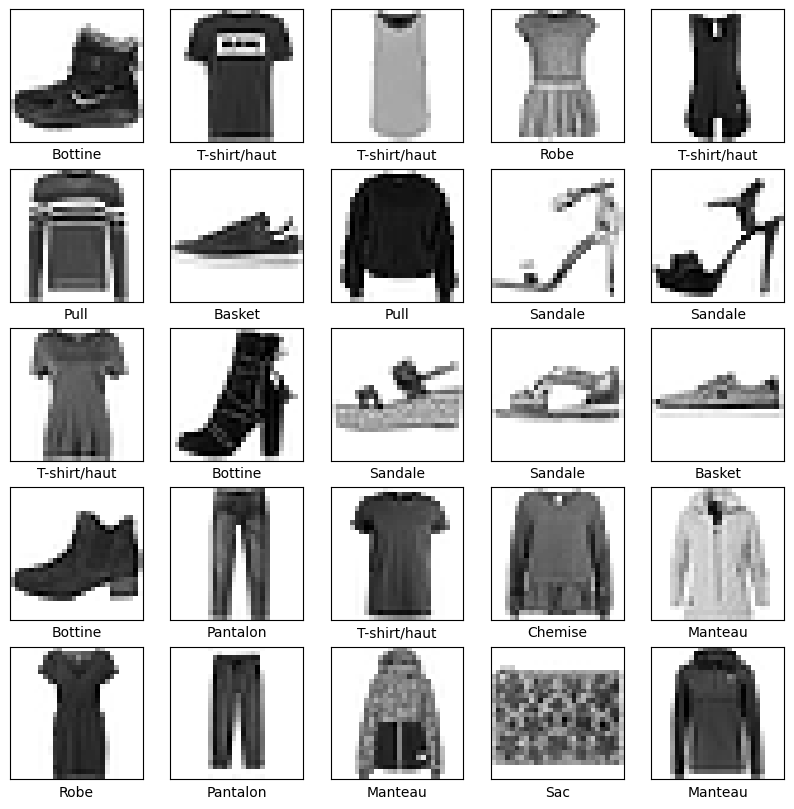

In [14]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


### Construction du modèle

In [19]:
model = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


### Entraînement du modèle

In [22]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7528 - loss: 0.7078 - val_accuracy: 0.8298 - val_loss: 0.4419
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8466 - loss: 0.4192 - val_accuracy: 0.8639 - val_loss: 0.3772
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8633 - loss: 0.3706 - val_accuracy: 0.8648 - val_loss: 0.3653
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8703 - loss: 0.3532 - val_accuracy: 0.8719 - val_loss: 0.3511
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8742 - loss: 0.3392 - val_accuracy: 0.8736 - val_loss: 0.3421
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8839 - loss: 0.3152 - val_accuracy: 0.8799 - val_loss: 0.3353
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8821 - loss: 0.3145 - val_accuracy: 0.8845 - val_loss: 0.3264
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8896 - loss: 0.2

### Évaluation du modèle

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Précision sur le jeu de test : {test_acc:.4f}")

313/313 - 1s - 4ms/step - accuracy: 0.8813 - loss: 0.3376
Précision sur le jeu de test : 0.8813


### Visualisation des performances

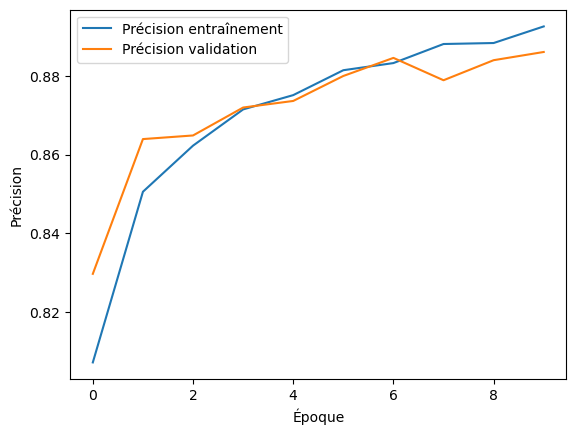

In [28]:
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.show()

### Prédictions sur de nouvelles données

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


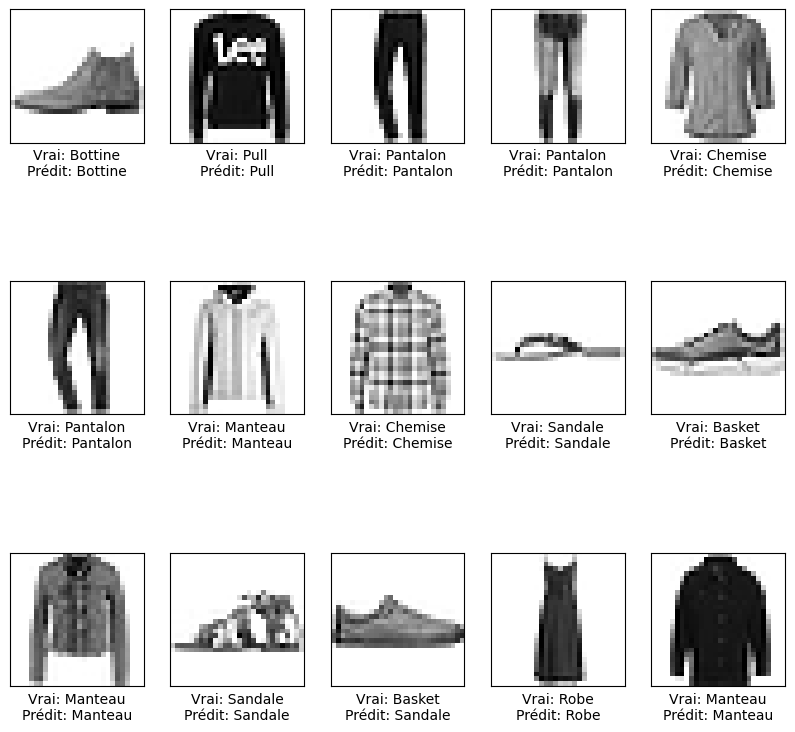

In [31]:
predictions = model.predict(X_test)
# Visualiser quelques prédictions
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"Vrai: {class_names[y_test[i]]}\nPrédit: {class_names[np.argmax(predictions[i])]}")
plt.show()

# Conclusion